# Aufgabe 1: Generische Rangordnungsoperatoren
Neben den linearen Filtern bzw. der Faltung stellen die *Rangordnungsoperatoren* eine weitere Klasse von Bildoperatoren dar.
Dabei wird ähnlich zur Faltung im Ortsbereich ein Fenster über das Bild geschoben.
Im Gegensatz zum linearen Filtern werden jedoch die Pixel nach Grauwerten sortiert und im Folgenden die aus dieser Ordnung resultierenden Ränge betrachtet, um das Ergebnis der Operation zu bestimmen.

Implementieren Sie die Operatoren *Minimum-*, *Maximum-* und *Medianfilter*, die für den aktuell betrachteten Pixel jeweils den ersten, letzten oder mittleren Wert der sortierten Folge setzen. Testen sie verschiedene Filtergrößen ($3 \times 3, 5 \times 5, \dots$) und interpretieren sie die Ergebnisse!
Was bewirken die Filter jeweils?

## 0. Pfade, Pakete etc.

In [14]:
import glob
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt

import PIL.Image
import numpy as np

In [15]:
image_filter = '../Bilder/*.jpg'

## 1. Definition der Filter
Definieren Sie zunächst die Filter als Funktionen `max_filter`, `min_filter`, `median_filter`, die eine Auswahl aus einer übergebenen *sortierten* Folge von Grauwerten treffen. Können diese Filter platzsparend als Lambda-Funktionen definiert werden?

In [16]:
max_filter = lambda sorted_values: sorted_values[-1]
min_filter = lambda sorted_values: sorted_values[0]
median_filter = lambda sorted_values: sorted_values[len(sorted_values)//2]

## 2. Laden des Bildes

In [17]:
image_path = np.random.choice(glob.glob(image_filter))
image = np.asarray(PIL.Image.open(image_path).convert('L'))

Für diese Aufgabe ist es wichtig, das Bild im Fließkommaformat vorliegen zu haben. Andernfalls kann der Median nicht immer korrekt berechnet werden. Konvertieren sie `image` zu einer geeigneten Repräsentation:

In [18]:
image = image.astype(np.float32)
image -= image.min()
image /= image.max()

## 3. Verrauschen des Bildes
Um ein realistisches Szenario zu simulieren, wird das Bild nun mit Salt-and-Pepper-Rauschen versehen.

Experimentieren Sie auch mit verschieden stark verrauschten Bildern!

In [19]:
image_noisy = np.copy(image)
for _ in range(10000):
    index = tuple([np.random.randint(0,i) for i in image.shape])
    image_noisy[index] = np.random.choice([0.0,1.0])

## 4. Berechung des Filters
Definieren Sie eine Funktion `ex4_rank_filter`, die ein Bild, eine Nachbarschaftsgröße und einen Rangordnungsfilter übergeben bekommt und als Rückgabewert das gefilterte Bild liefert.

In [20]:
def ex4_rank_filter(image, w, rank_filter):
    filtered_image = np.zeros_like(image)
    pad_width = w // 2
    padded_image = np.pad(image, pad_width, mode='edge')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+w, j:j+w].flatten()
            sorted_values = np.sort(neighborhood)
            filtered_image[i, j] = rank_filter(sorted_values)
    return filtered_image

Nun wird das gefilterte Bild mit Hilfe der Funktion berechnet:

In [21]:
filtered_image = ex4_rank_filter(image_noisy, 5, median_filter)

## 5. Darstellung
Um die Wirksamkeit des Rangordnungsoperators zu überprüfen, stellen Sie `image`, `image_noisy` und `filtered_image` nebeneinander dar:

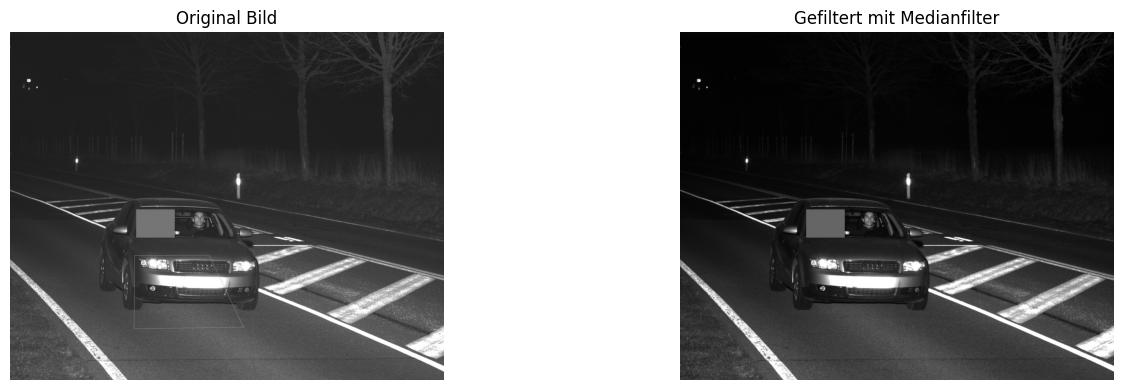

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Bild')
axes[0].axis('off')

axes[1].imshow(np.abs(filtered_image), cmap='gray')
axes[1].set_title('Gefiltert mit Medianfilter')
axes[1].axis('off')

plt.tight_layout()
plt.show()

Testen sie verschiedene Filtergrößen ($3 \times 3, 5 \times 5, \dots$) und interpretieren sie die Ergebnisse!

Was bewirken die verschiedenen Rangordnungsoperatoren jeweils?

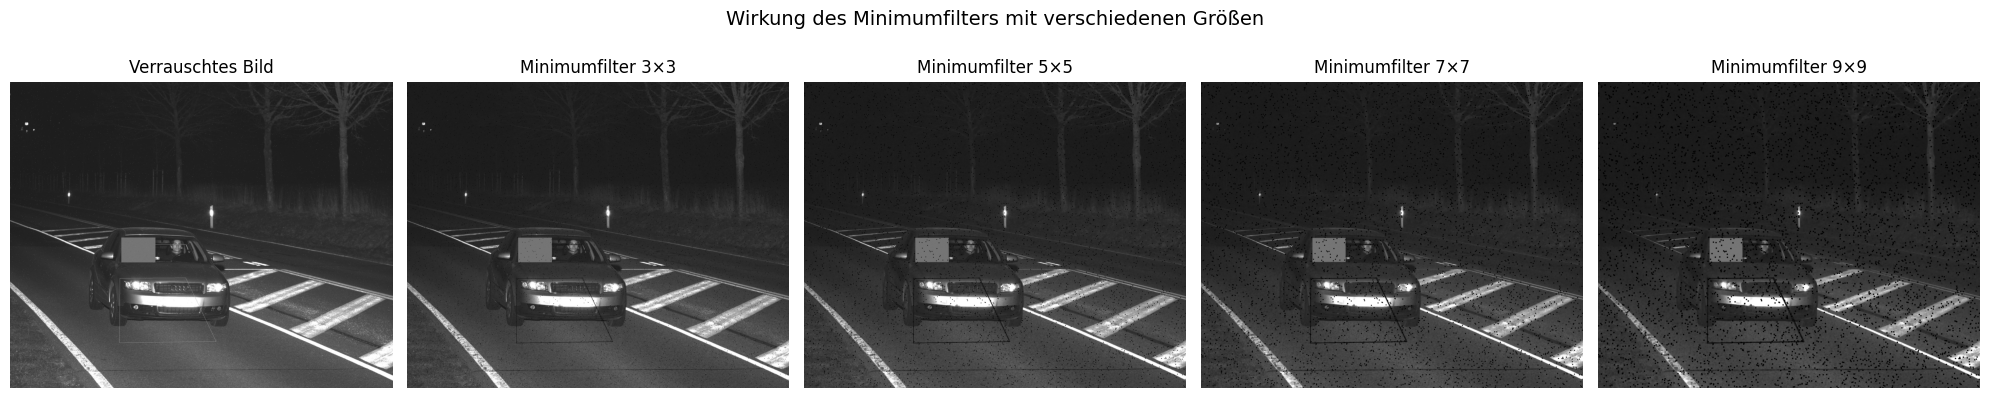

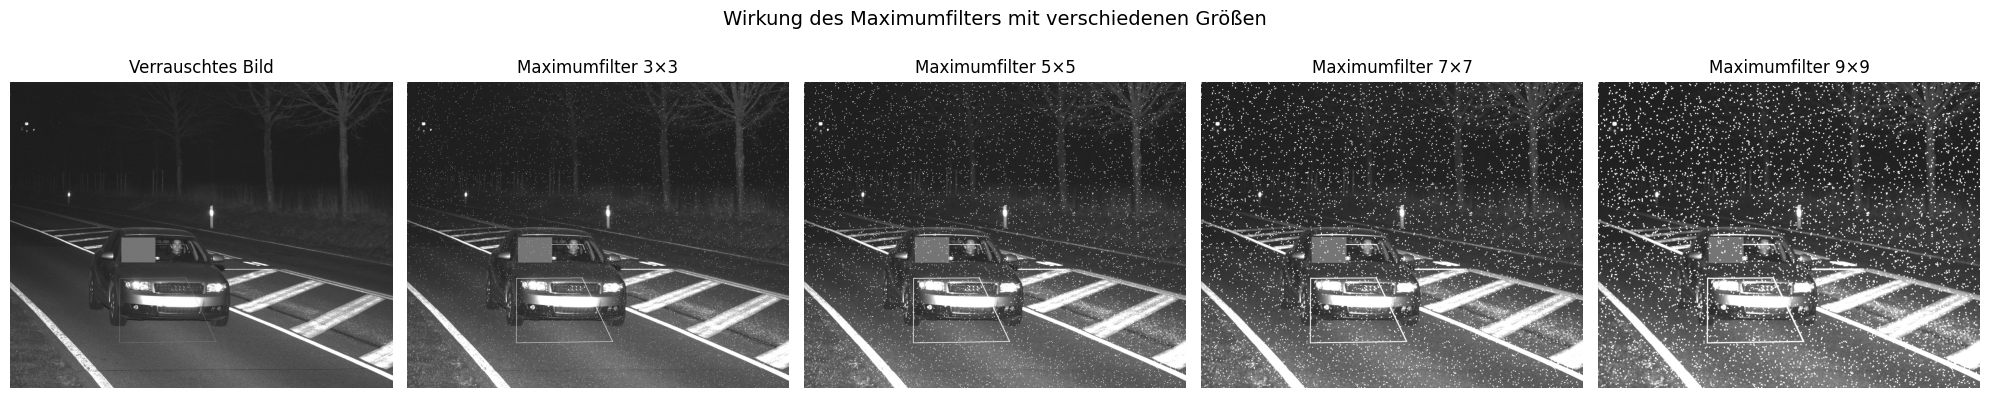

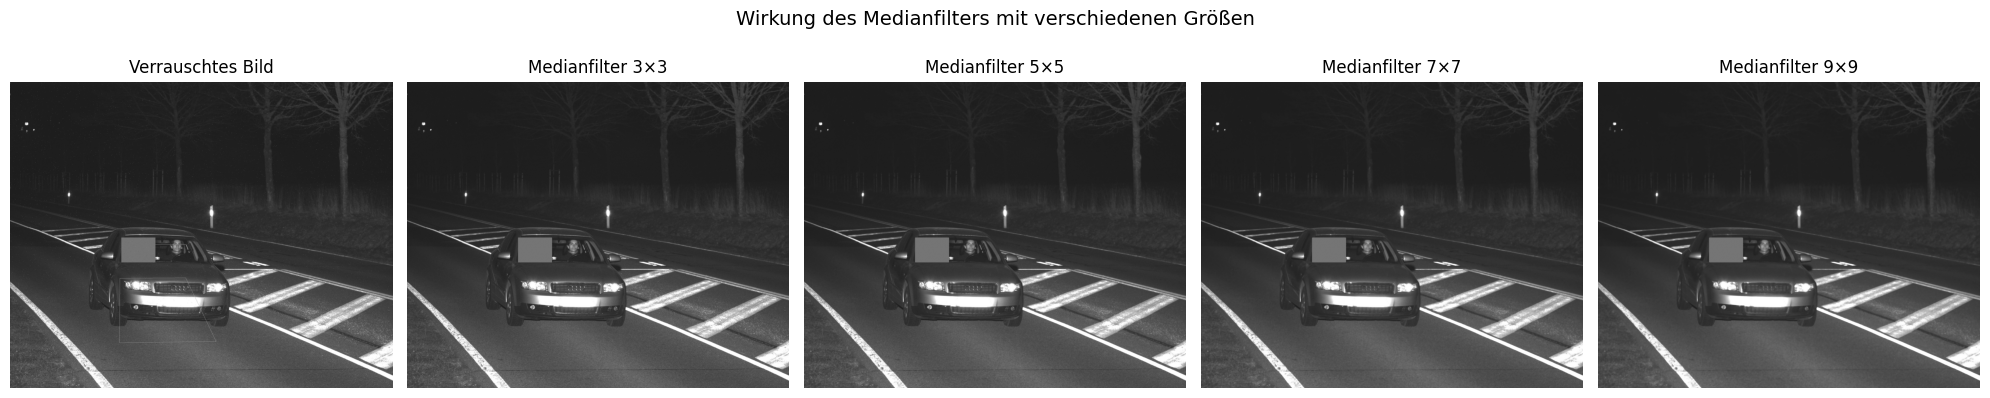

In [23]:
# Test verschiedener Filtergrößen mit allen Rangordnungsoperatoren
filter_sizes = [3, 5, 7, 9]
filters = {
    'Minimum': min_filter,
    'Maximum': max_filter,
    'Median': median_filter
}

# Teste alle Kombinationen
for filter_name, rank_filter in filters.items():
    fig, axes = plt.subplots(1, len(filter_sizes) + 1, figsize=(20, 4))

    # Zeige verrauschtes Bild
    axes[0].imshow(image_noisy, cmap='gray', vmin=0, vmax=1)
    axes[0].set_title('Verrauschtes Bild')
    axes[0].axis('off')

    # Wende Filter mit verschiedenen Größen an
    for idx, w in enumerate(filter_sizes):
        filtered = ex4_rank_filter(image_noisy, w, rank_filter)
        axes[idx + 1].imshow(filtered, cmap='gray', vmin=0, vmax=1)
        axes[idx + 1].set_title(f'{filter_name}filter {w}×{w}')
        axes[idx + 1].axis('off')

    plt.suptitle(f'Wirkung des {filter_name}filters mit verschiedenen Größen', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()


## Interpretation der Ergebnisse

### Medianfilter:
- **Wirkung**: Entfernt Salt-and-Pepper-Rauschen sehr effektiv, während Kanten und Details weitgehend erhalten bleiben
- **Mechanismus**: Wählt den mittleren Wert aus der sortierten Nachbarschaft - extreme Ausreißer (0.0 oder 1.0) werden ignoriert
- **Filtergröße**:
  - Kleinere Filter (3×3): Schneller, aber weniger effektiv bei starkem Rauschen
  - Größere Filter (7×7, 9×9): Bessere Rauschunterdrückung, aber zunehmende Glättung und Detailverlust

### Minimumfilter:
- **Wirkung**: Verstärkt dunkle Bereiche und lässt das Bild insgesamt dunkler erscheinen (Erosion)
- **Mechanismus**: Wählt den kleinsten Wert aus der Nachbarschaft
- **Effekt auf Rauschen**: Entfernt helle "Salz"-Pixel, verstärkt aber dunkle "Pfeffer"-Pixel
- **Filtergröße**: Größere Filter führen zu stärkerer Erosion und Verdunkelung

### Maximumfilter:
- **Wirkung**: Verstärkt helle Bereiche und lässt das Bild insgesamt heller erscheinen (Dilatation)
- **Mechanismus**: Wählt den größten Wert aus der Nachbarschaft
- **Effekt auf Rauschen**: Entfernt dunkle "Pfeffer"-Pixel, verstärkt aber helle "Salz"-Pixel
- **Filtergröße**: Größere Filter führen zu stärkerer Dilatation und Aufhellung

### Vergleich:
Der **Medianfilter** ist für die Rauschunterdrückung am besten geeignet, da er beide Arten von Rauschen entfernt.
**Minimum-** und **Maximumfilter** sind morphologische Operatoren, die für spezielle Bildverarbeitungsaufgaben nützlich sind.